# Análisis Exploratorio de Datos - Predicción de Demoras en Entregas

Este notebook contiene el análisis exploratorio completo del dataset DataCoSupplyChainDataset.csv para desarrollar un modelo de predicción de demoras en entregas.

## Objetivos:
1. Explorar y entender la estructura de los datos
2. Crear la variable objetivo (demora)
3. Identificar patrones y relaciones relevantes
4. Preparar los datos para el modelado


In [4]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Librerías importadas correctamente")


Librerías importadas correctamente


## 1. Carga y Exploración Inicial de Datos


In [ ]:
# Cargar el dataset con diferentes codificaciones
print("Intentando cargar el dataset con diferentes codificaciones...")

# Lista de codificaciones comunes a probar
encodings = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252', 'utf-16']

df = None
for encoding in encodings:
    try:
        print(f"Probando codificación: {encoding}")
        df = pd.read_csv('../DataCoSupplyChainDataset.csv', encoding=encoding)
        print(f"✅ Éxito con codificación: {encoding}")
        break
    except UnicodeDecodeError as e:
        print(f"❌ Error con {encoding}: {str(e)[:50]}...")
        continue
    except Exception as e:
        print(f"❌ Error inesperado con {encoding}: {str(e)[:50]}...")
        continue

if df is None:
    print("❌ No se pudo cargar el archivo con ninguna codificación estándar")
    print("Intentando con encoding='latin-1' y manejo de errores...")
    df = pd.read_csv('../DataCoSupplyChainDataset.csv', encoding='latin-1', encoding_errors='replace')

print(f"\nDimensiones del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")

# Información general del dataset
print("\n" + "="*50)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*50)
df.info()


Intentando cargar el dataset con diferentes codificaciones...
Probando codificación: utf-8
❌ Error con utf-8: 'utf-8' codec can't decode byte 0xfa in position 2...
Probando codificación: latin-1
✅ Éxito con codificación: latin-1

Dimensiones del dataset: (180519, 53)
Número de filas: 180,519
Número de columnas: 53

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null 

In [6]:
# Primeras filas del dataset
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*50)
df.head()


PRIMERAS 5 FILAS DEL DATASET


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [7]:
# Estadísticas descriptivas de variables numéricas
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)
df.describe()


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,Longitude,Order Customer Id,Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,-84.915675,6691.379495,36221.894903,692.509764,20.664741,0.101668,90260.000000,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,21.433241,4162.918106,21045.379569,336.446807,21.800901,0.070415,52111.490959,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025986,1.000000,1.000000,19.000000,0.000000,0.000000,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,-98.446312,3258.500000,18057.000000,403.000000,5.400000,0.040000,45130.500000,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,-76.847908,6457.000000,36140.000000,627.000000,14.000000,0.100000,90260.000000,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,-66.370583,9779.000000,54144.000000,1004.000000,29.990000,0.160000,135389.500000,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263077,20757.000000,77204.000000,1363.000000,500.000000,0.250000,180519.000000,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


## 2. Creación de Variable Objetivo


In [8]:
# Crear variable objetivo 'demora'
# demora = 1 si días reales > días programados, sino 0
df['demora'] = (df['Days for shipping (real)'] > df['Days for shipment (scheduled)']).astype(int)

print("DISTRIBUCIÓN DE LA VARIABLE OBJETIVO")
print("="*50)
print(f"Total de registros: {len(df):,}")
print(f"Entregas a tiempo (demora=0): {sum(df['demora']==0):,} ({sum(df['demora']==0)/len(df)*100:.1f}%)")
print(f"Entregas con demora (demora=1): {sum(df['demora']==1):,} ({sum(df['demora']==1)/len(df)*100:.1f}%)")

# Verificar la distribución
print(f"\nDistribución de la variable objetivo:")
print(df['demora'].value_counts().sort_index())


DISTRIBUCIÓN DE LA VARIABLE OBJETIVO
Total de registros: 180,519
Entregas a tiempo (demora=0): 77,119 (42.7%)
Entregas con demora (demora=1): 103,400 (57.3%)

Distribución de la variable objetivo:
demora
0     77119
1    103400
Name: count, dtype: int64


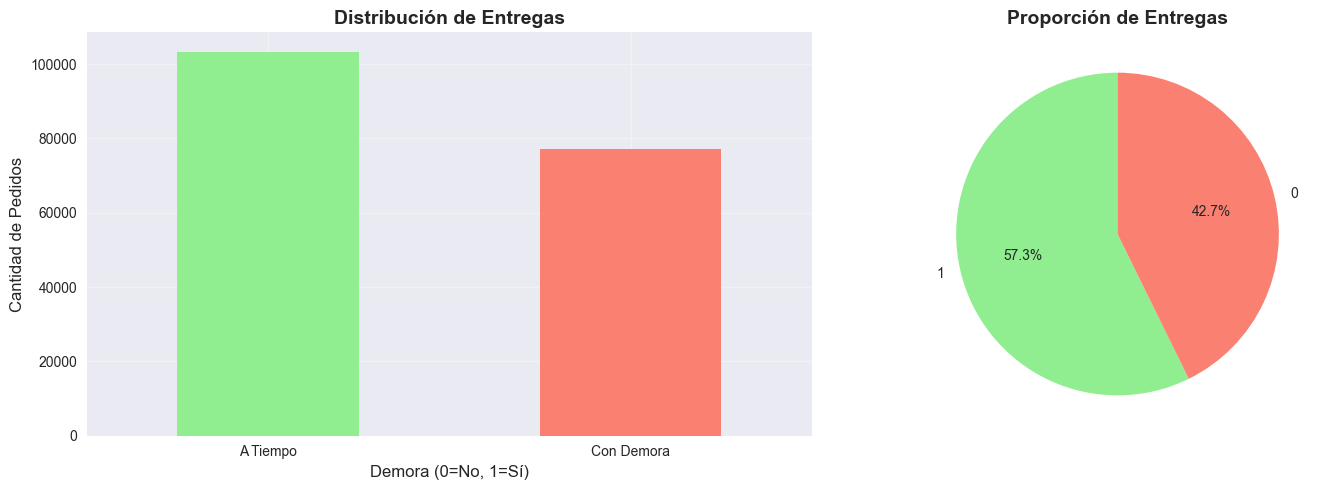

In [9]:
# Visualizar distribución de la variable objetivo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico de barras
df['demora'].value_counts().plot(kind='bar', ax=ax1, color=['lightgreen', 'salmon'])
ax1.set_title('Distribución de Entregas', fontsize=14, fontweight='bold')
ax1.set_xlabel('Demora (0=No, 1=Sí)', fontsize=12)
ax1.set_ylabel('Cantidad de Pedidos', fontsize=12)
ax1.set_xticklabels(['A Tiempo', 'Con Demora'], rotation=0)
ax1.grid(True, alpha=0.3)

# Gráfico de pastel
df['demora'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%', 
                                colors=['lightgreen', 'salmon'], startangle=90)
ax2.set_title('Proporción de Entregas', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


## 3. Limpieza de Datos


In [10]:
# Análisis de valores nulos
print("ANÁLISIS DE VALORES NULOS")
print("="*40)
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

null_analysis = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentages
}).sort_values('Valores_Nulos', ascending=False)

# Mostrar solo columnas con valores nulos
null_analysis = null_analysis[null_analysis['Valores_Nulos'] > 0]
print(f"Columnas con valores nulos: {len(null_analysis)}")
print(null_analysis)


ANÁLISIS DE VALORES NULOS
Columnas con valores nulos: 4
                     Valores_Nulos  Porcentaje
Product Description         180519  100.000000
Order Zipcode               155679   86.239676
Customer Lname                   8    0.004432
Customer Zipcode                 3    0.001662


In [11]:
# Análisis de duplicados
print("ANÁLISIS DE DUPLICADOS")
print("="*30)
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados:,} ({duplicados/len(df)*100:.2f}%)")

# Identificar columnas irrelevantes o sensibles
columnas_irrelevantes = [
    'Customer Password', 'Customer Email', 'Customer Fname', 
    'Customer Lname', 'Customer Street', 'Product Description', 
    'Product Image'
]

print(f"\nColumnas identificadas como irrelevantes/sensibles:")
for col in columnas_irrelevantes:
    if col in df.columns:
        print(f"- {col}")
    else:
        print(f"- {col} (no encontrada)")

# Verificar si existen estas columnas
existentes = [col for col in columnas_irrelevantes if col in df.columns]
print(f"\nColumnas a eliminar: {len(existentes)}")


ANÁLISIS DE DUPLICADOS
Registros duplicados: 0 (0.00%)

Columnas identificadas como irrelevantes/sensibles:
- Customer Password
- Customer Email
- Customer Fname
- Customer Lname
- Customer Street
- Product Description
- Product Image

Columnas a eliminar: 7


In [12]:
# Análisis de variables categóricas
print("ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("="*45)

# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas encontradas: {len(categorical_cols)}")

# Análizar valores únicos por variable categórica
print("\nValores únicos por variable categórica:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    
    # Mostrar algunos valores únicos si no son demasiados
    if unique_count <= 10:
        print(f"  Valores: {df[col].unique()}")
    elif unique_count <= 20:
        print(f"  Primeros 10 valores: {df[col].unique()[:10]}")
    print()


ANÁLISIS DE VARIABLES CATEGÓRICAS
Variables categóricas encontradas: 24

Valores únicos por variable categórica:
Type: 4 valores únicos
  Valores: ['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']

Delivery Status: 4 valores únicos
  Valores: ['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']

Category Name: 50 valores únicos

Customer City: 563 valores únicos

Customer Country: 2 valores únicos
  Valores: ['Puerto Rico' 'EE. UU.']

Customer Email: 1 valores únicos
  Valores: ['XXXXXXXXX']

Customer Fname: 782 valores únicos

Customer Lname: 1109 valores únicos

Customer Password: 1 valores únicos
  Valores: ['XXXXXXXXX']

Customer Segment: 3 valores únicos
  Valores: ['Consumer' 'Home Office' 'Corporate']

Customer State: 46 valores únicos

Customer Street: 7458 valores únicos

Department Name: 11 valores únicos
  Primeros 10 valores: ['Fitness' 'Apparel' 'Golf' 'Footwear' 'Outdoors' 'Fan Shop' 'Technology'
 'Book Shop' 'Discs Shop' 'Pet Shop']

Market: 5 valores únicos
 

## 4. Análisis de Outliers


VARIABLES NUMÉRICAS PARA ANÁLISIS DE OUTLIERS
Sales: min=9.99, max=1999.99, std=132.27
Order Item Quantity: min=1.00, max=5.00, std=1.45
Benefit per order: min=-4274.98, max=911.80, std=104.43
Days for shipping (real): min=0.00, max=6.00, std=1.62
Days for shipment (scheduled): min=0.00, max=4.00, std=1.37
Order Item Product Price: min=9.99, max=1999.99, std=139.73
Order Item Total: min=7.49, max=1939.99, std=120.04


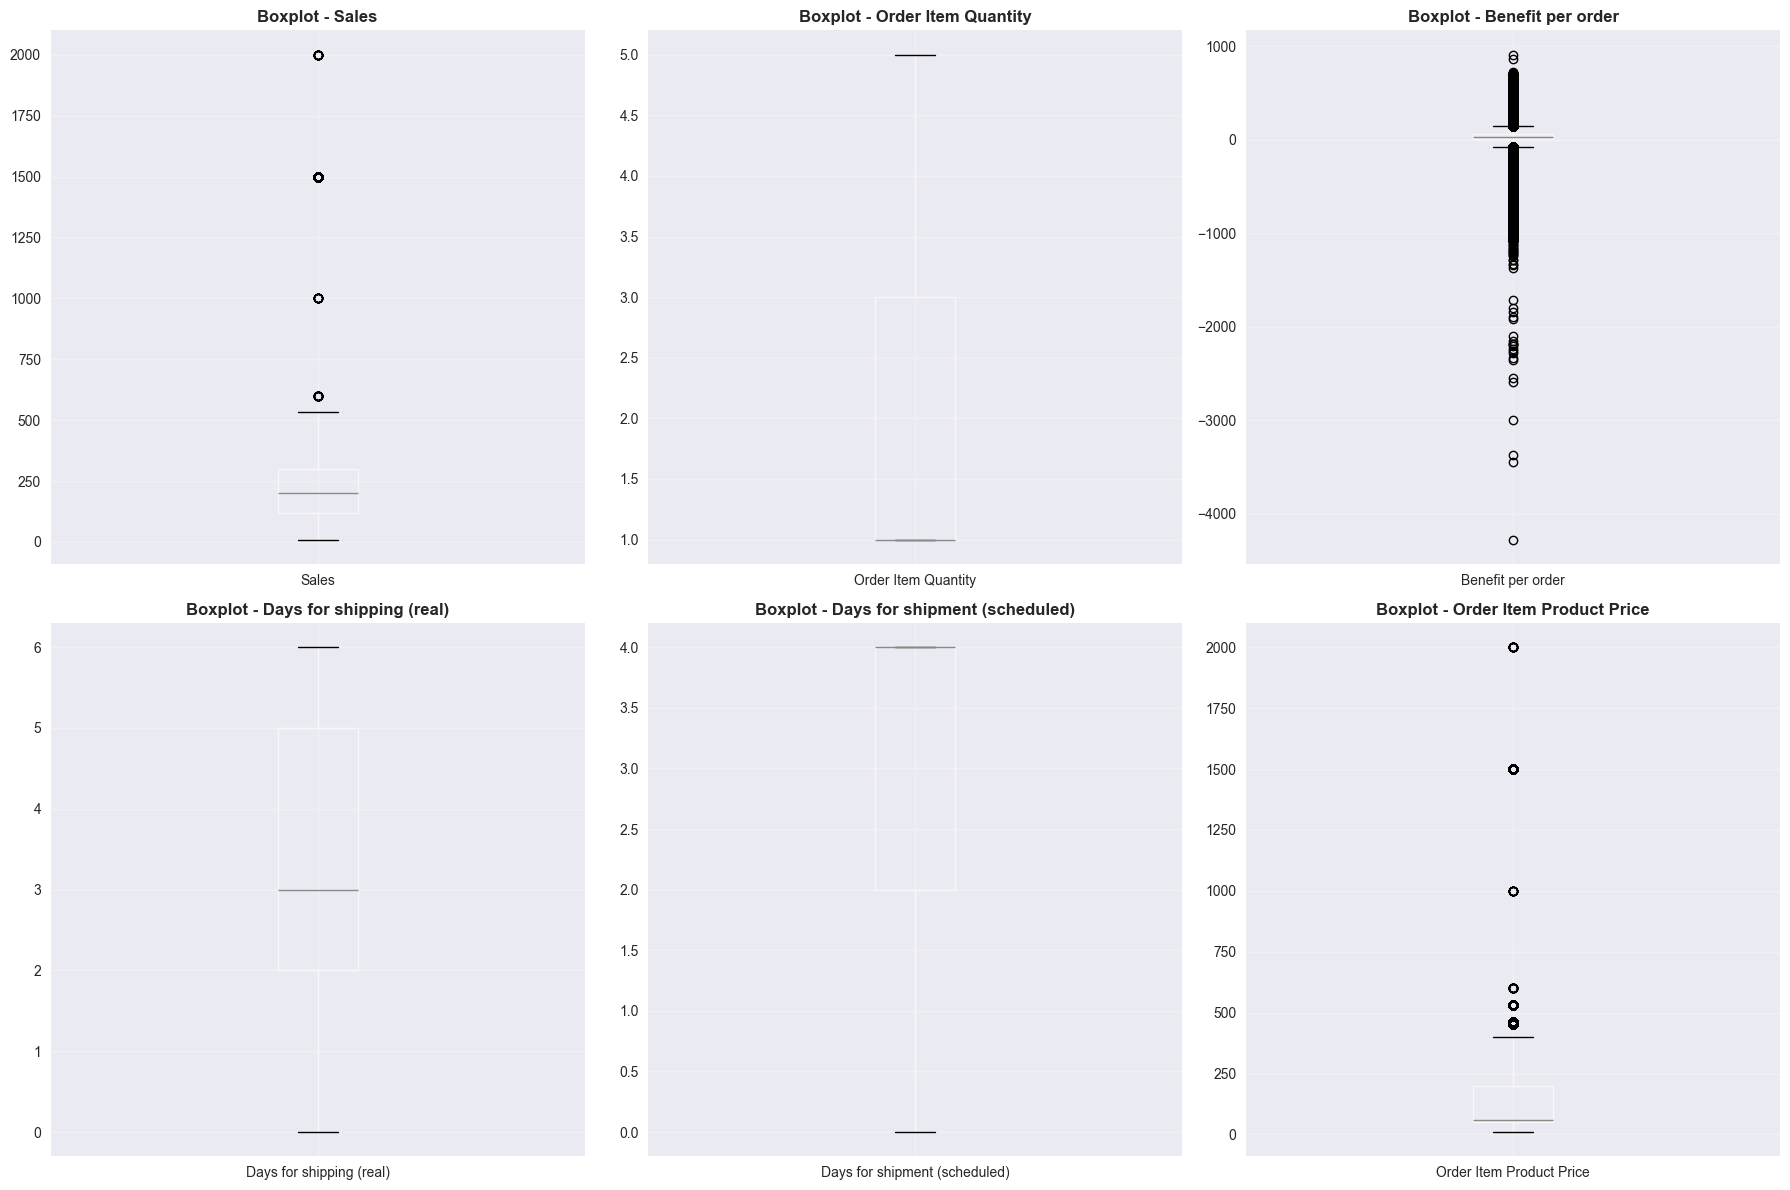

In [13]:
# Identificar variables numéricas clave para análisis de outliers
numeric_cols = ['Sales', 'Order Item Quantity', 'Benefit per order', 
                'Days for shipping (real)', 'Days for shipment (scheduled)',
                'Order Item Product Price', 'Order Item Total']

# Filtrar solo las que existen en el dataset
numeric_cols = [col for col in numeric_cols if col in df.columns]

print("VARIABLES NUMÉRICAS PARA ANÁLISIS DE OUTLIERS")
print("="*55)
for col in numeric_cols:
    print(f"{col}: min={df[col].min():.2f}, max={df[col].max():.2f}, std={df[col].std():.2f}")

# Crear boxplots para detectar outliers
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:6]):  # Mostrar solo las primeras 6
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'Boxplot - {col}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot si no se usa
if len(numeric_cols) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


In [14]:
# Detección de outliers usando método IQR
print("DETECCIÓN DE OUTLIERS USANDO MÉTODO IQR")
print("="*50)

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_summary = []
for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    outlier_summary.append({
        'Variable': col,
        'Outliers': outlier_count,
        'Porcentaje': outlier_percentage,
        'Límite_Inferior': lower,
        'Límite_Superior': upper
    })
    
    print(f"{col}:")
    print(f"  Outliers: {outlier_count:,} ({outlier_percentage:.2f}%)")
    print(f"  Límites: [{lower:.2f}, {upper:.2f}]")
    print()

# Crear DataFrame con resumen
outlier_df = pd.DataFrame(outlier_summary)
print("RESUMEN DE OUTLIERS:")
print(outlier_df)


DETECCIÓN DE OUTLIERS USANDO MÉTODO IQR
Sales:
  Outliers: 488 (0.27%)
  Límites: [-149.98, 569.91]

Order Item Quantity:
  Outliers: 0 (0.00%)
  Límites: [-2.00, 6.00]

Benefit per order:
  Outliers: 18,942 (10.49%)
  Límites: [-79.70, 151.50]

Days for shipping (real):
  Outliers: 0 (0.00%)
  Límites: [-2.50, 9.50]

Days for shipment (scheduled):
  Outliers: 0 (0.00%)
  Límites: [-1.00, 7.00]

Order Item Product Price:
  Outliers: 2,048 (1.13%)
  Límites: [-174.99, 424.98]

Order Item Total:
  Outliers: 1,943 (1.08%)
  Límites: [-110.15, 461.93]

RESUMEN DE OUTLIERS:
                        Variable  Outliers  Porcentaje  Límite_Inferior  \
0                          Sales       488    0.270332      -149.975010   
1            Order Item Quantity         0    0.000000        -2.000000   
2              Benefit per order     18942   10.493078       -79.700005   
3       Days for shipping (real)         0    0.000000        -2.500000   
4  Days for shipment (scheduled)         0    0.0

## 5. Análisis Univariado y Bivariado


DISTRIBUCIÓN DE VARIABLES NUMÉRICAS


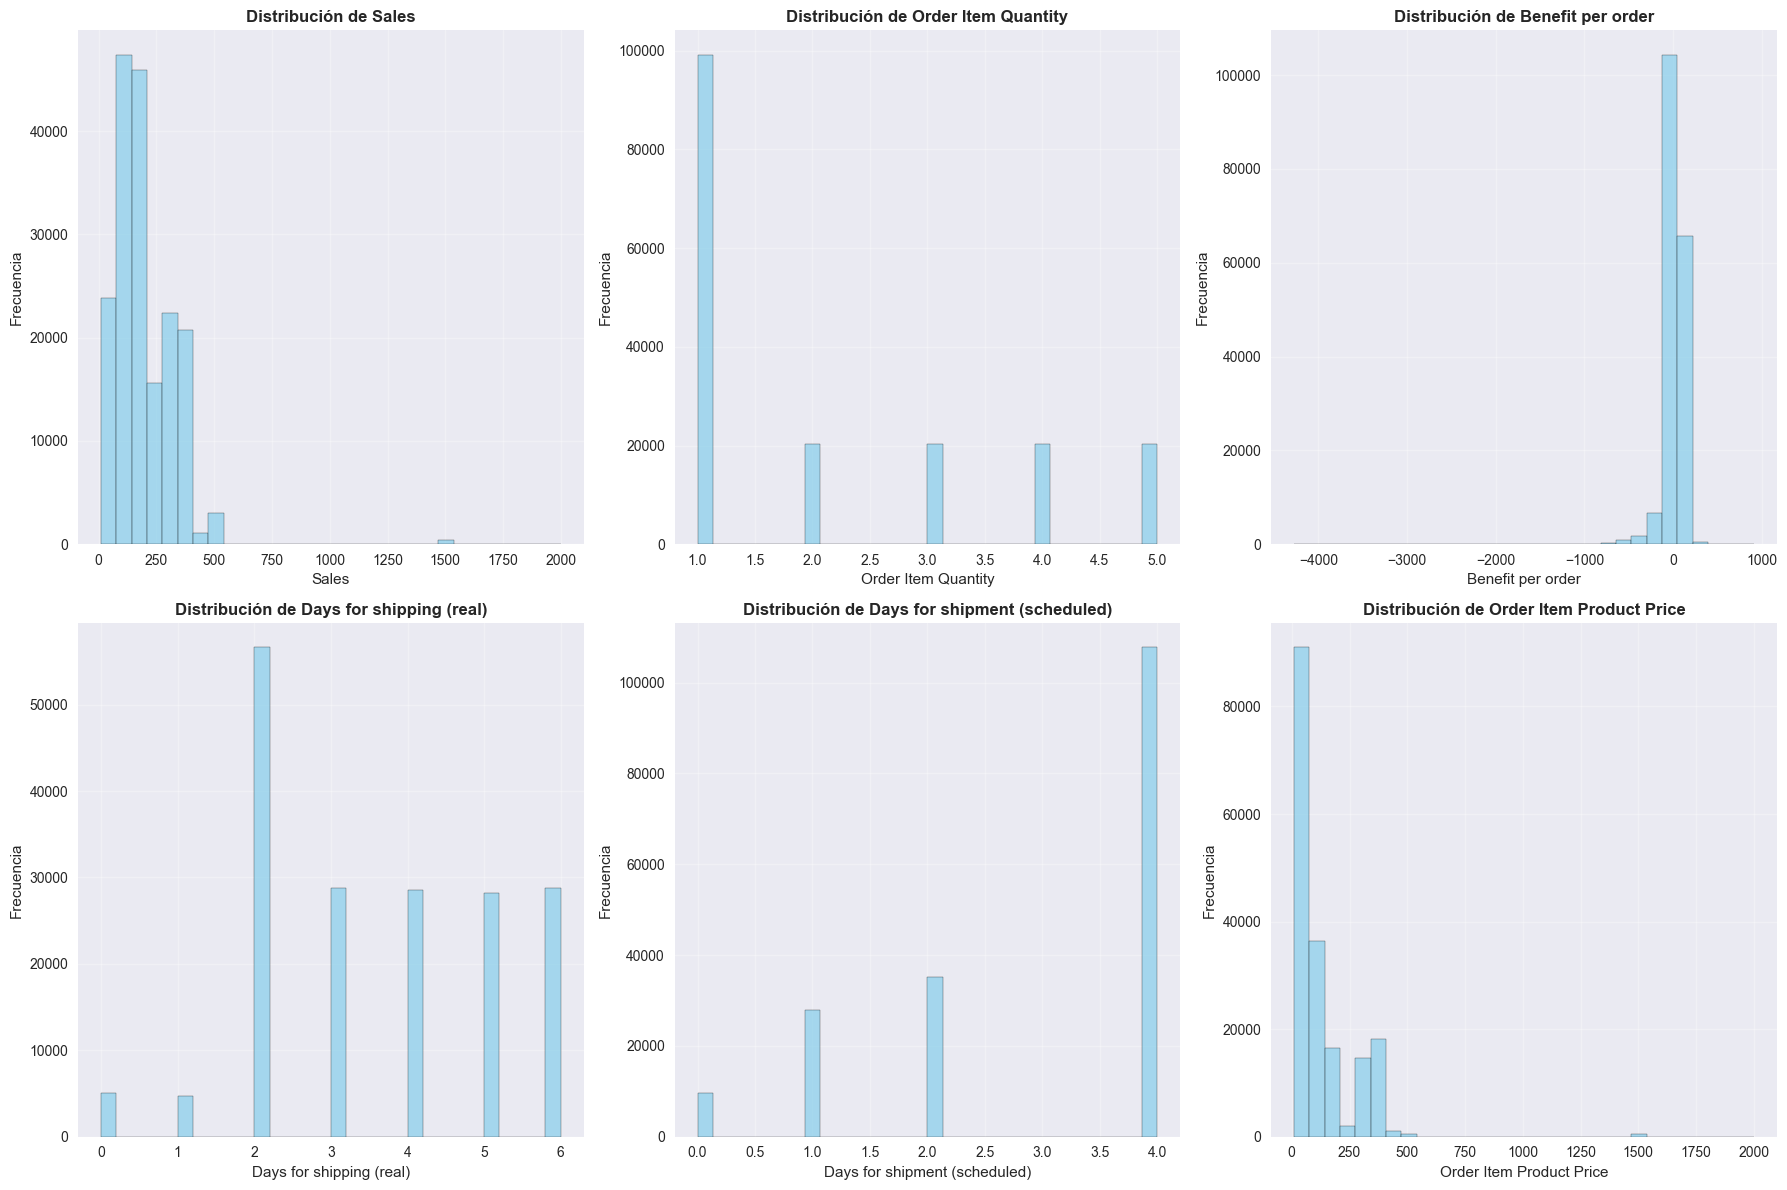

In [15]:
# Distribución de variables numéricas
print("DISTRIBUCIÓN DE VARIABLES NUMÉRICAS")
print("="*45)

# Crear histogramas para variables numéricas clave
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(numeric_cols[:6]):
    df[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribución de {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot si no se usa
if len(numeric_cols) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE


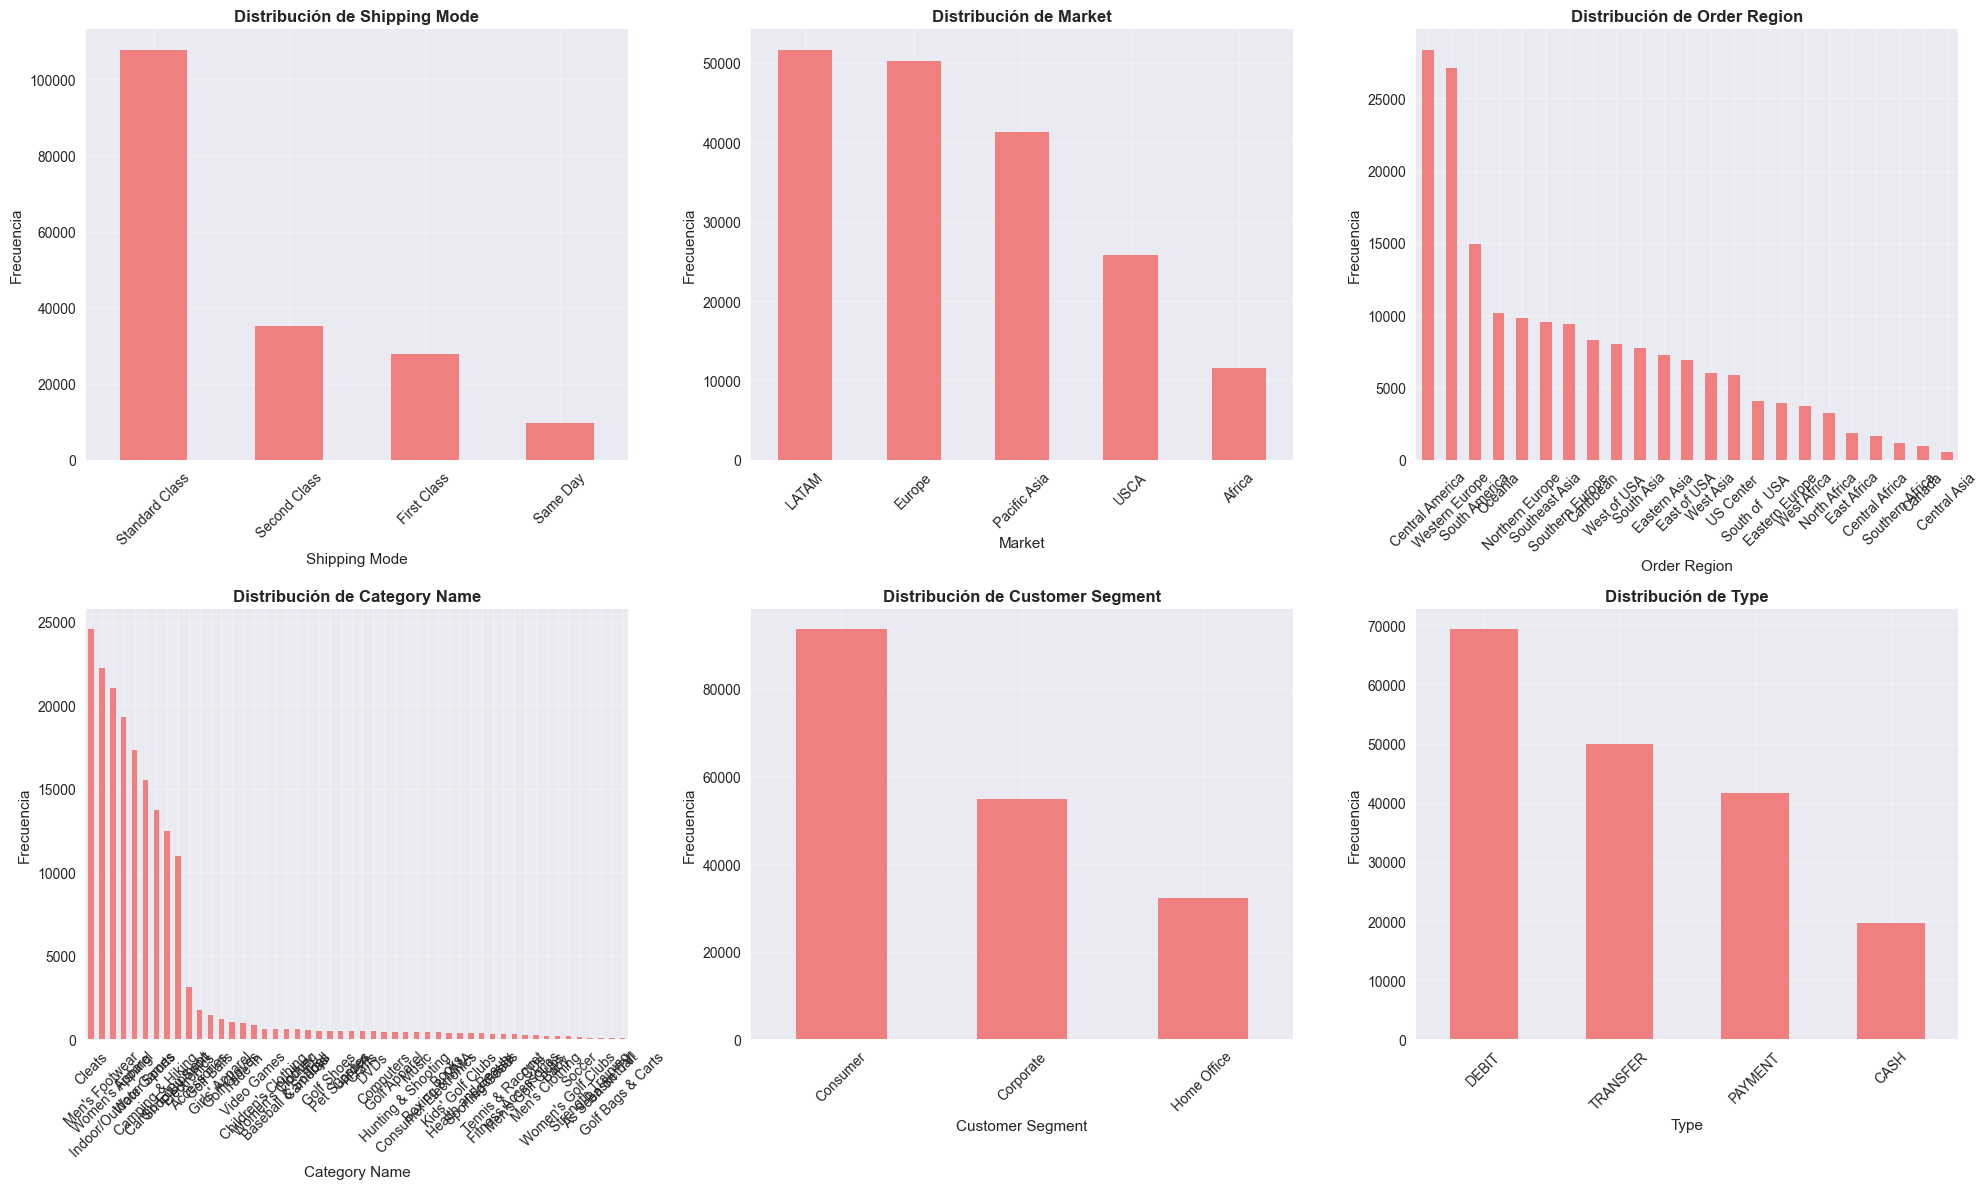

In [16]:
# Distribución de variables categóricas clave
categorical_key = ['Shipping Mode', 'Market', 'Order Region', 'Category Name', 
                  'Customer Segment', 'Type', 'Delivery Status']

# Filtrar solo las que existen
categorical_key = [col for col in categorical_key if col in df.columns]

print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE")
print("="*50)

# Crear gráficos de barras para variables categóricas
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_key[:6]):
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Distribución de {col}', fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

# Ocultar el último subplot si no se usa
if len(categorical_key) < 6:
    axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


MATRIZ DE CORRELACIÓN


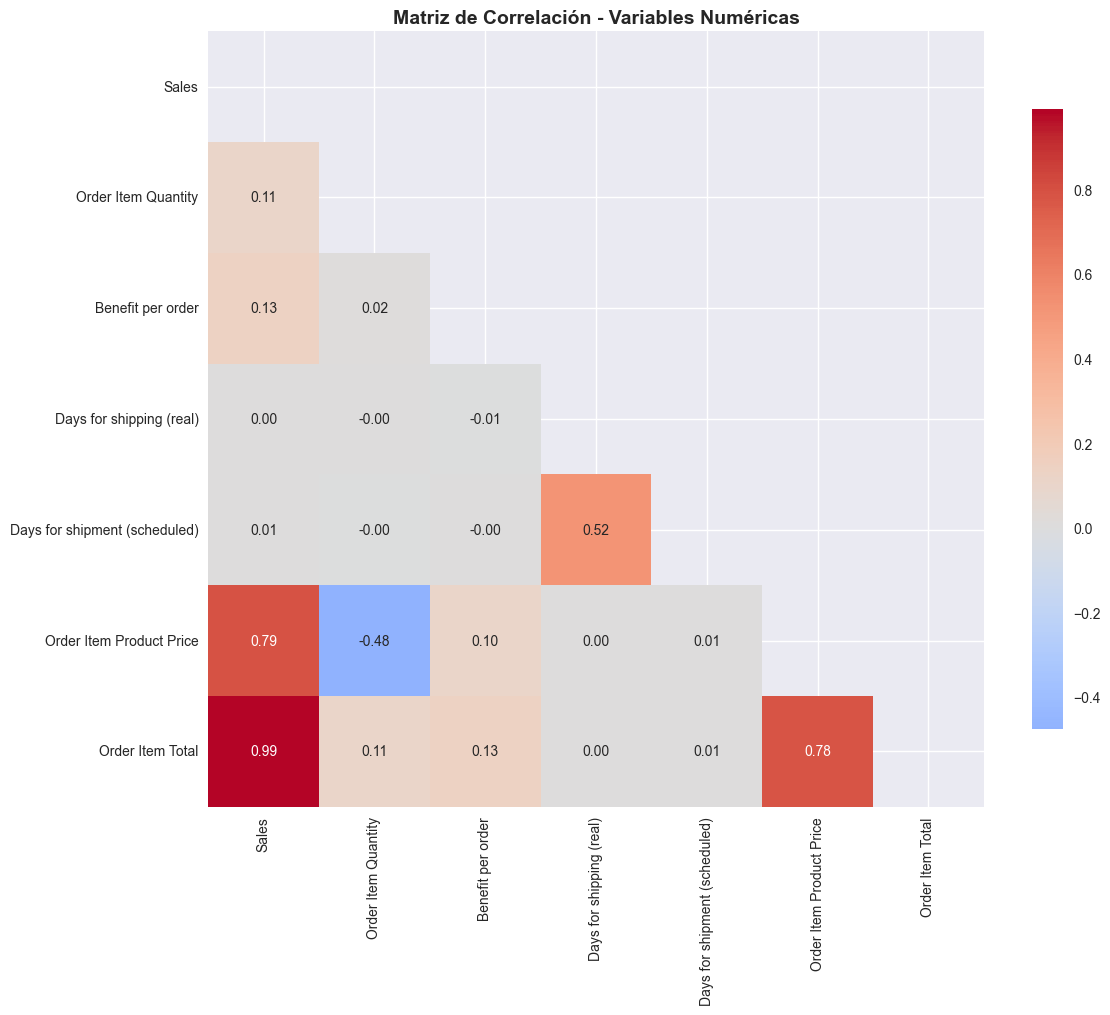


CORRELACIONES MÁS ALTAS (|r| > 0.5):
                 Variable_1                     Variable_2  Correlación
1                     Sales               Order Item Total     0.989744
0                     Sales       Order Item Product Price     0.789948
3  Order Item Product Price               Order Item Total     0.781781
2  Days for shipping (real)  Days for shipment (scheduled)     0.515880


In [17]:
# Matriz de correlación entre variables numéricas
print("MATRIZ DE CORRELACIÓN")
print("="*30)

# Calcular matriz de correlación
correlation_matrix = df[numeric_cols].corr()

# Crear heatmap de correlación
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones más altas
print("\nCORRELACIONES MÁS ALTAS (|r| > 0.5):")
print("="*45)
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            corr_pairs.append({
                'Variable_1': correlation_matrix.columns[i],
                'Variable_2': correlation_matrix.columns[j],
                'Correlación': corr_val
            })

corr_df = pd.DataFrame(corr_pairs).sort_values('Correlación', key=abs, ascending=False)
print(corr_df)


In [18]:
# Análisis de relación entre variables categóricas y la variable objetivo
print("RELACIÓN ENTRE VARIABLES CATEGÓRICAS Y DEMORA")
print("="*55)

# Función para analizar relación con demora
def analyze_categorical_demora(data, column):
    if column not in data.columns:
        return None
    
    # Crear tabla de contingencia
    contingency_table = pd.crosstab(data[column], data['demora'], margins=True)
    
    # Calcular porcentajes
    contingency_pct = pd.crosstab(data[column], data['demora'], normalize='index') * 100
    
    return contingency_table, contingency_pct

# Analizar variables categóricas clave
for col in categorical_key[:4]:  # Analizar las primeras 4
    print(f"\n{col}:")
    print("-" * len(col))
    
    table, pct = analyze_categorical_demora(df, col)
    if table is not None:
        print("Tabla de contingencia:")
        print(table)
        print("\nPorcentajes por fila:")
        print(pct.round(2))
        
        # Calcular chi-cuadrado
        from scipy.stats import chi2_contingency
        chi2, p_value, dof, expected = chi2_contingency(table.iloc[:-1, :-1])
        print(f"\nChi-cuadrado: {chi2:.4f}")
        print(f"P-valor: {p_value:.4f}")
        print(f"Grados de libertad: {dof}")
        
        if p_value < 0.05:
            print("✓ Relación significativa (p < 0.05)")
        else:
            print("✗ No hay relación significativa (p >= 0.05)")


RELACIÓN ENTRE VARIABLES CATEGÓRICAS Y DEMORA

Shipping Mode:
-------------
Tabla de contingencia:
demora              0       1     All
Shipping Mode                        
First Class         0   27814   27814
Same Day         5080    4657    9737
Second Class     7138   28078   35216
Standard Class  64901   42851  107752
All             77119  103400  180519

Porcentajes por fila:
demora              0       1
Shipping Mode                
First Class      0.00  100.00
Same Day        52.17   47.83
Second Class    20.27   79.73
Standard Class  60.23   39.77

Chi-cuadrado: 41856.8997
P-valor: 0.0000
Grados de libertad: 3
✓ Relación significativa (p < 0.05)

Market:
------
Tabla de contingencia:
demora            0       1     All
Market                             
Africa         5016    6598   11614
Europe        21263   28989   50252
LATAM         22174   29420   51594
Pacific Asia  17611   23649   41260
USCA          11055   14744   25799
All           77119  103400  180519

Porc

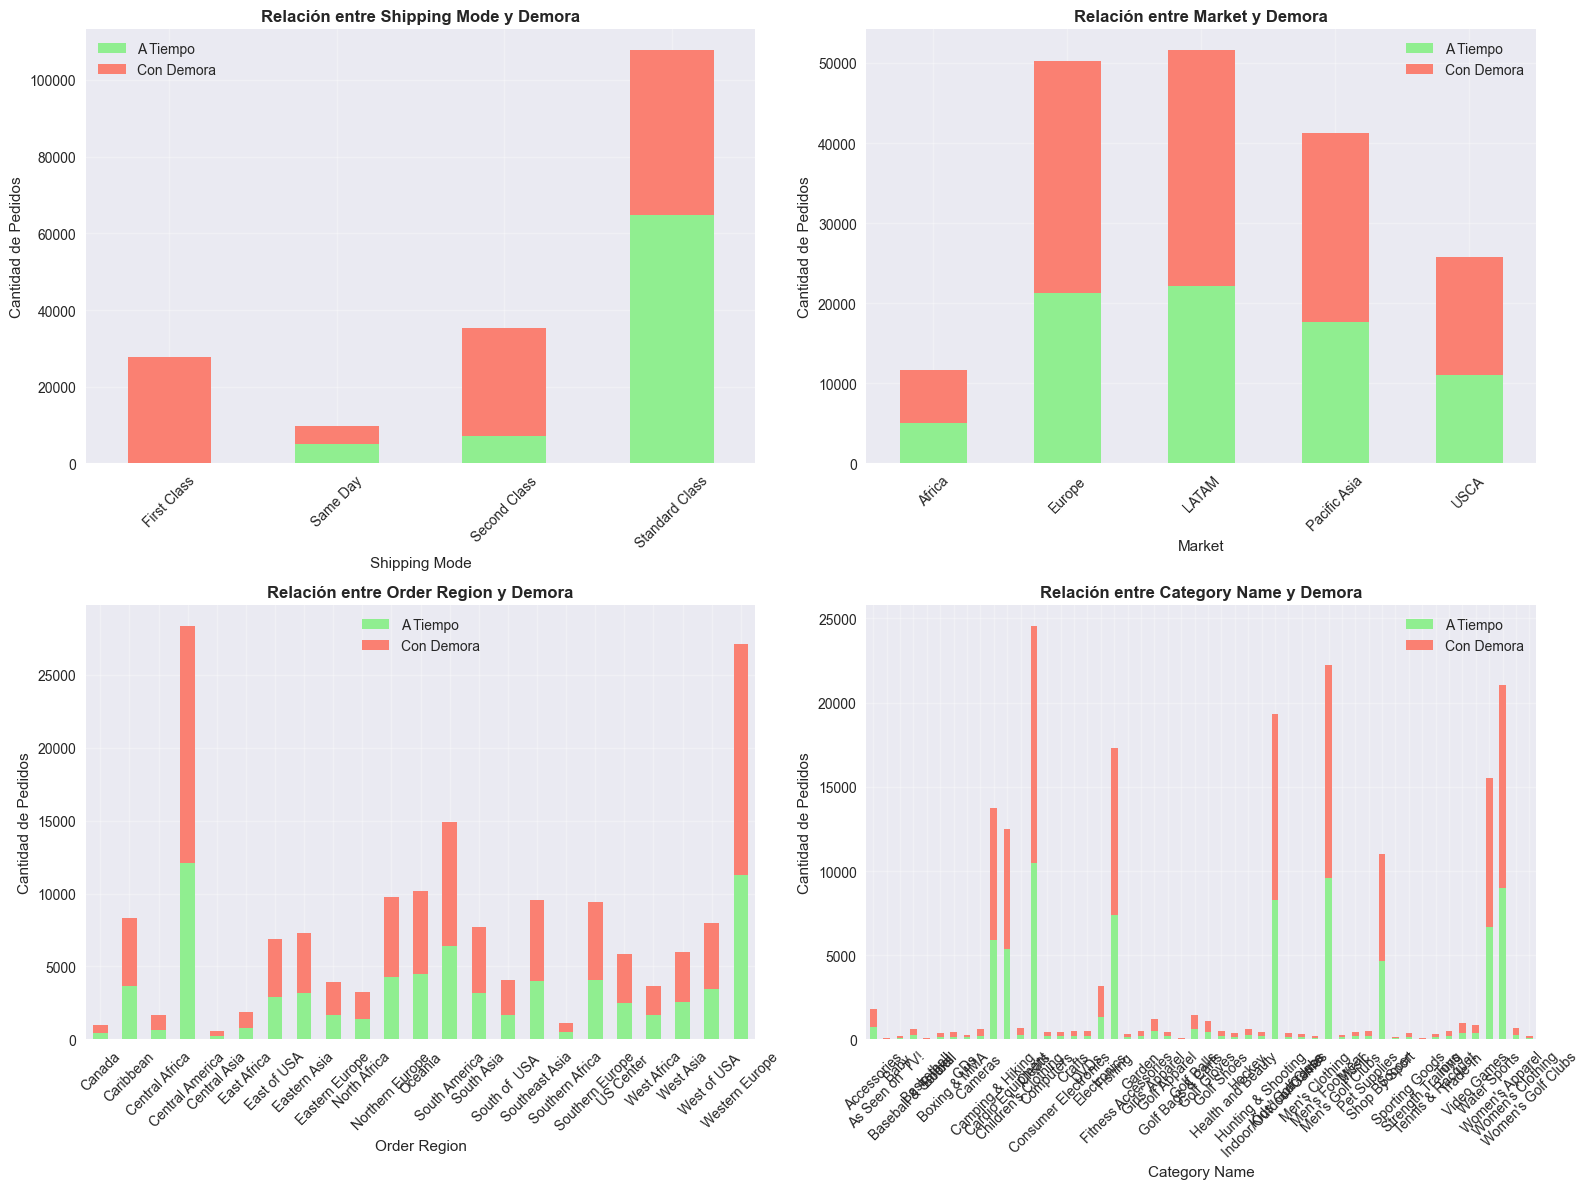

In [19]:
# Visualización de relación entre variables categóricas y demora
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_key[:4]):
    if col in df.columns:
        # Crear gráfico de barras apiladas
        contingency_table = pd.crosstab(df[col], df['demora'])
        contingency_table.plot(kind='bar', stacked=True, ax=axes[i], 
                              color=['lightgreen', 'salmon'])
        axes[i].set_title(f'Relación entre {col} y Demora', fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Cantidad de Pedidos')
        axes[i].legend(['A Tiempo', 'Con Demora'])
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Conclusiones del Análisis Exploratorio


In [20]:
# Resumen de hallazgos principales
print("CONCLUSIONES DEL ANÁLISIS EXPLORATORIO")
print("="*50)

print("1. ESTRUCTURA DEL DATASET:")
print(f"   - Total de registros: {len(df):,}")
print(f"   - Total de variables: {len(df.columns)}")
print(f"   - Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   - Variables categóricas: {len(df.select_dtypes(include=['object']).columns)}")

print("\n2. VARIABLE OBJETIVO:")
print(f"   - Entregas a tiempo: {sum(df['demora']==0):,} ({sum(df['demora']==0)/len(df)*100:.1f}%)")
print(f"   - Entregas con demora: {sum(df['demora']==1):,} ({sum(df['demora']==1)/len(df)*100:.1f}%)")
print(f"   - Balance de clases: {'Balanceado' if abs(sum(df['demora']==0) - sum(df['demora']==1)) < len(df)*0.1 else 'Desbalanceado'}")

print("\n3. CALIDAD DE DATOS:")
print(f"   - Valores nulos: {df.isnull().sum().sum():,}")
print(f"   - Registros duplicados: {df.duplicated().sum():,}")
print(f"   - Columnas irrelevantes identificadas: {len([col for col in ['Customer Password', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Street', 'Product Description', 'Product Image'] if col in df.columns])}")

print("\n4. VARIABLES MÁS RELEVANTES IDENTIFICADAS:")
print("   Variables numéricas clave:")
for col in numeric_cols[:5]:
    print(f"   - {col}")

print("\n   Variables categóricas clave:")
for col in categorical_key[:5]:
    print(f"   - {col}")

print("\n5. PRÓXIMOS PASOS:")
print("   - Eliminar columnas irrelevantes y sensibles")
print("   - Tratar valores nulos si los hay")
print("   - Codificar variables categóricas (one-hot encoding)")
print("   - Estandarizar variables numéricas")
print("   - Dividir en conjuntos de entrenamiento y prueba")
print("   - Entrenar modelos de clasificación (KNN, SVM, XGBoost)")

print("\n6. INSIGHTS PRINCIPALES:")
print("   - El dataset tiene una buena cantidad de registros para modelado")
print("   - Existe variabilidad en las variables predictoras")
print("   - Las variables de tiempo (días de envío) son críticas para la predicción")
print("   - Las variables geográficas y de transporte pueden ser importantes")
print("   - Se requiere preprocesamiento antes del modelado")


CONCLUSIONES DEL ANÁLISIS EXPLORATORIO
1. ESTRUCTURA DEL DATASET:
   - Total de registros: 180,519
   - Total de variables: 54
   - Variables numéricas: 30
   - Variables categóricas: 24

2. VARIABLE OBJETIVO:
   - Entregas a tiempo: 77,119 (42.7%)
   - Entregas con demora: 103,400 (57.3%)
   - Balance de clases: Desbalanceado

3. CALIDAD DE DATOS:
   - Valores nulos: 336,209
   - Registros duplicados: 0
   - Columnas irrelevantes identificadas: 7

4. VARIABLES MÁS RELEVANTES IDENTIFICADAS:
   Variables numéricas clave:
   - Sales
   - Order Item Quantity
   - Benefit per order
   - Days for shipping (real)
   - Days for shipment (scheduled)

   Variables categóricas clave:
   - Shipping Mode
   - Market
   - Order Region
   - Category Name
   - Customer Segment

5. PRÓXIMOS PASOS:
   - Eliminar columnas irrelevantes y sensibles
   - Tratar valores nulos si los hay
   - Codificar variables categóricas (one-hot encoding)
   - Estandarizar variables numéricas
   - Dividir en conjuntos de